In [52]:
import pandas as pd
df = pd.read_csv('DATA/upbit_BTC_prices_2023_days.csv').drop(columns='Unnamed: 0')

import ta
import ta.utils
high = df['high_price'].astype('float')
low = df['low_price'].astype('float')
close = df['trade_price'].astype('float')
adx = ta.trend.ADXIndicator(high=high, low=low, close=close)

df['ADX'] = adx.adx().astype('float')
df['PDI'] = adx.adx_pos().astype('float')
df['MDI'] = adx.adx_neg().astype('float')
df['candle_date_time_utc'] = pd.to_datetime(df['candle_date_time_utc'])
# df = df.loc[df['ADX']!=0]
# df = df.reset_index(drop=['index'])
df[26:]


,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate,ADX,PDI,MDI
26,KRW-BTC,2022-12-31,2022-12-31T09:00:00,21086000.0,21249000.0,20966000.0,21079000.0,1672531199722,6.253054e+10,2960.900095,21070000.0,9000.0,0.000427,0.000000,9.082208,35.805930
27,KRW-BTC,2023-01-01,2023-01-01T09:00:00,21079000.0,21171000.0,21002000.0,21123000.0,1672617597561,3.135794e+10,1486.467553,21079000.0,44000.0,0.002087,46.125337,8.794441,34.671432
28,KRW-BTC,2023-01-02,2023-01-02T09:00:00,21128000.0,21400000.0,21047000.0,21215000.0,1672703999647,5.484883e+10,2578.844531,21123000.0,92000.0,0.004355,45.987488,12.525351,32.364719
29,KRW-BTC,2023-01-03,2023-01-03T09:00:00,21209000.0,21451000.0,21178000.0,21351000.0,1672790398972,4.477008e+10,2097.615306,21215000.0,136000.0,0.006411,45.627332,12.848549,30.665519
30,KRW-BTC,2023-01-04,2023-01-04T09:00:00,21351000.0,21732000.0,21341000.0,21588000.0,1672876797009,5.338029e+10,2479.248182,21351000.0,237000.0,0.011100,44.105277,17.269770,28.368288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,KRW-BTC,2023-12-27,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3965.842823,57032000.0,888000.0,0.015570,24.173608,17.771379,23.667198
388,KRW-BTC,2023-12-28,2023-12-28T09:00:00,57920000.0,58468000.0,56700000.0,56907000.0,1703807999951,2.269573e+11,3958.816736,57920000.0,-1013000.0,-0.017490,23.239841,17.526000,21.902958
389,KRW-BTC,2023-12-29,2023-12-29T09:00:00,56904000.0,57300000.0,56000000.0,56450000.0,1703894399762,2.419572e+11,4273.270718,56907000.0,-457000.0,-0.008031,22.846464,16.549140,23.683399
390,KRW-BTC,2023-12-30,2023-12-30T09:00:00,56450000.0,57150000.0,56101000.0,56639000.0,1703980799652,1.301367e+11,2301.724829,56450000.0,189000.0,0.003348,22.481185,15.784601,22.589271


### BTC DMI 시각화

##### PDI의 MDI 돌파하는 시점 찾기

In [53]:

cross_list = list()
PDI_stat = 'lower'
for i in range(len(df)):
    if PDI_stat == 'lower' and df.loc[i]['PDI']>=df.loc[i]['MDI']:
          PDI_stat = 'upper'
          cross_dict = dict()
          cross_dict['candle_date_time_utc'] = df.loc[i]['candle_date_time_utc'] 
          cross_dict['how'] = 'PDI upper'
          cross_list.append(cross_dict)
    elif PDI_stat == 'upper' and df.loc[i]['PDI']<=df.loc[i]['MDI']:
          PDI_stat = 'lower'
          cross_dict = dict()
          cross_dict['candle_date_time_utc'] = df.loc[i]['candle_date_time_utc'] 
          cross_dict['how'] = 'MDI upper'
          cross_list.append(cross_dict)
df_cross = pd.DataFrame(cross_list)
df_cross = pd.merge(df,df_cross,on='candle_date_time_utc')
df_cross

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate,ADX,PDI,MDI,how
0,KRW-BTC,2022-12-05,2022-12-05T09:00:00,22918000.0,23150000.0,22685000.0,22725000.0,1670284798929,8.377634e+10,3649.930863,22906000.0,-181000.0,-0.007902,0.000000,0.000000,0.000000,PDI upper
1,KRW-BTC,2022-12-06,2022-12-06T09:00:00,22729000.0,22885000.0,22701000.0,22821000.0,1670371198322,6.444548e+10,2826.972610,22725000.0,96000.0,0.004224,0.000000,0.000000,0.000000,MDI upper
2,KRW-BTC,2022-12-07,2022-12-07T09:00:00,22837000.0,22898000.0,22400000.0,22544000.0,1670457598939,7.637182e+10,3381.147876,22821000.0,-277000.0,-0.012138,0.000000,0.000000,0.000000,PDI upper
3,KRW-BTC,2022-12-08,2022-12-08T09:00:00,22544000.0,23000000.0,22484000.0,22918000.0,1670543999042,6.023865e+10,2658.301222,22544000.0,374000.0,0.016590,0.000000,0.000000,0.000000,MDI upper
4,KRW-BTC,2022-12-09,2022-12-09T09:00:00,22918000.0,23000000.0,22770000.0,22849000.0,1670630398088,5.371503e+10,2349.726274,22918000.0,-69000.0,-0.003011,0.000000,0.000000,0.000000,PDI upper
5,KRW-BTC,2022-12-10,2022-12-10T09:00:00,22845000.0,22940000.0,22820000.0,22831000.0,1670716798664,3.064659e+10,1339.765766,22849000.0,-18000.0,-0.000788,0.000000,0.000000,0.000000,MDI upper
6,KRW-BTC,2022-12-11,2022-12-11T09:00:00,22824000.0,22915000.0,22760000.0,22775000.0,1670803199985,3.635057e+10,1591.849025,22831000.0,-56000.0,-0.002453,0.000000,0.000000,0.000000,PDI upper
7,KRW-BTC,2022-12-12,2022-12-12T09:00:00,22784000.0,22882000.0,22487000.0,22824000.0,1670889599415,5.508452e+10,2436.297641,22775000.0,49000.0,0.002151,0.000000,0.000000,0.000000,MDI upper
8,KRW-BTC,2022-12-13,2022-12-13T09:00:00,22824000.0,23600000.0,22570000.0,23161000.0,1670975999667,1.206757e+11,5226.527815,22824000.0,337000.0,0.014765,0.000000,0.000000,0.000000,PDI upper
9,KRW-BTC,2022-12-14,2022-12-14T09:00:00,23182000.0,23941000.0,23147000.0,23235000.0,1671062399569,9.466048e+10,4041.522730,23161000.0,74000.0,0.003195,0.000000,0.000000,0.000000,MDI upper


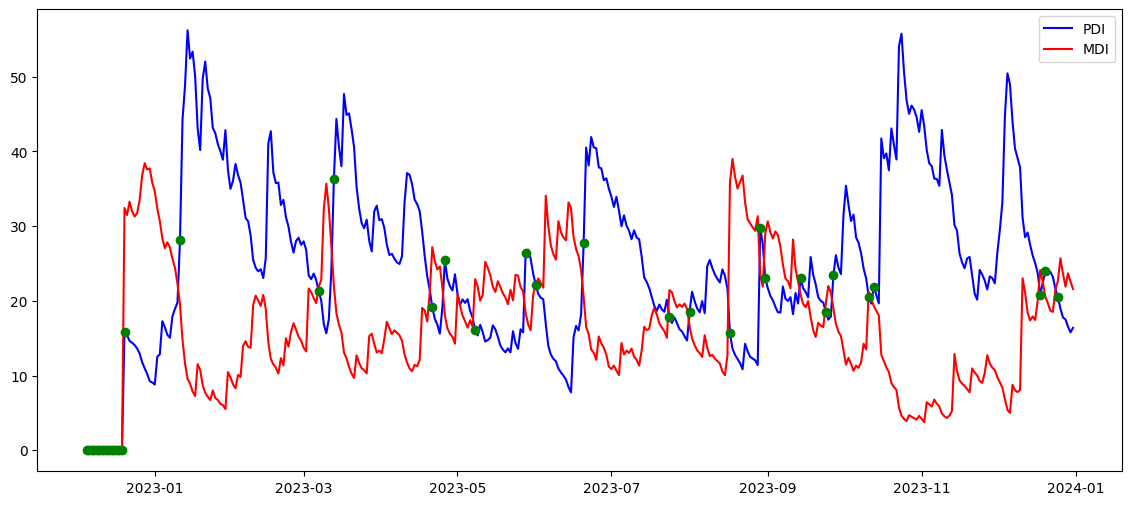

In [54]:
import pandas as pd

import ta
import ta.utils
high = df['high_price'].astype('float')
low = df['low_price'].astype('float')
close = df['trade_price'].astype('float')
adx = ta.trend.ADXIndicator(high=high, low=low, close=close)

df['ADX'] = adx.adx().astype('float')
df['PDI'] = adx.adx_pos().astype('float')
df['MDI'] = adx.adx_neg().astype('float')
df['candle_date_time_utc'] = pd.to_datetime(df['candle_date_time_utc'])

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(14,6))
df_mat = df.copy()
plt.plot(df_mat['candle_date_time_utc'], df_mat['PDI'], color = 'b', label = 'PDI')
plt.plot(df_mat['candle_date_time_utc'], df_mat['MDI'], color = 'r', label = 'MDI')
plt.plot(df_cross['candle_date_time_utc'], df_cross['PDI'], 'go',)
# plt.plot(df_cross['candle_date_time_utc'], df_cross['MDI'], 'ro',)
# plt.plot(df_mat['candle_date_time_utc'], df_mat['ADX'], color = 'g', label = 'ADX')

plt.legend()
plt.show()

### BTC ADX 시각화

##### 기본개념

- Average Directioinal Movement Index 는 Directional Movement Index 에서 사용된 DI를 이용하여 추세의 강도를 측정하기 위해 만든 지표로 가격이 횡보 국면에 있을 때는 0에 가까운 값을 가지게 되고 상승 혹은 하락추세가 강하게 보일수록 ADX의 값은 커지게 된다.

- 이것은 하락과 상승을 반복하는 단순한 곡선이지만 추세의 시작과 그 끝, 그리고 추세가 계속 진행 중에 있는지를 알려주는 유용한 지표이다. 또한 하락과 상승중인 추세의 강도를 나타내므로 PDI, MDI와 병행 사용하면 유용한 매매 판단 지표로 사용할 수 있다. ADX가 큰 값을 보이면 현재의 추세 강도가 강하게 나타내는 것을 의미하며 ADX의 값이 적으면 적을수록 현재의 추세 강도가 약하다는 것을 의미한다.

- 이 지표는 상승, 혹은 하락하는 추세의 강도만을 나타내므로 PDI 와 MDI 를 반드시 같이 사용하여야 하고 ADX 의 추세를 분석하기 위하여 ADX 의 10일 단순 이동평균 값을 구하여 골든, 데드 크로스의 방법을 사용하는 매매 방법이 있다.

- ADX 에서 Directional의 의미는 상승이나 하락 모두를 의미하므로 ADX가 증가한다고 반드시 가격이 상승추세를 의미하는 것은 아니다. ADX는 단지 추세의 강도만을 나타낼 뿐이며 ADX지표 자체로는 상승추세인지 하락 추세인지를 알 수가 없는 것이다.

##### 계산방법

- nDX = (nPDI - |nMDI|)/(nPDI + nMDI)

- ADX(i) = i일 간의 nDX 이동평균

##### 매매기법

- 추세의 확인을 위한 보조지표로 이용

- ADX값이 저점에서 상승을 시작했는데 주가가 하락하는 역전이 시작되는 경우에는 주가가 상당폭 하락할 것을 예상하여 추가적인 매도에 가담해야 한다.

- ADX값이 고점을 형성하고 하락하면서 주가가 상승하는 역전 현상이 타날 경우에는 하락하던 주가가 반등을 시도하는 것으로 보고 단기매매에 국한해야 한다.

- 하락하던 ADX 값이 재상승하면서 주가가 계속적으로 상승하는 경우는 자주 나타나지는 않지만 상승전환한다고 판단하면 된다.

- 주가와 ADX값이 정배열되어 움직이는 경우에는 ADX(14) 값이 12%이하에서 저점을 형성하고 상승을 시도할 때 매수하고 40% 이상에서 하락반전할 때 매도하는 전략이 유효하다.

- 특히 1차 상승 후 20-40% 사이에서 재반전하여 상승하는 종목은 주가 탄력성이 상당히 큰 경우가 많다.

- ADX의 선이 하락하고 있다면 이는 현재 진행되는 추세는 힘을 잃고 시장은 혼조 또는 등락을 거듭하며 박스권을 이루는 횡보 장세에 진입함을 말하며 이 때에는 추세 분석 지표보다는 RSI나 스토캐스틱과 같은 오실레이터형 추세 반전형 투자전략을 사용하는 방법이 좋다. 
- 그러나 ADX가 감소하는 횡보 장세에서 추세 반전형 지표를 사용하여 매매하더라도, 가격 움직임 범위가 일정 수준이 되지 않으며 이익확보가 어려우므로, 추세가 강한 시장에서 추세 추종형 투자전략을 선호하는 투자가는 ADX 감소시 추세반전형 투자전략이나 추세 추종형 투자전략 모두를 사용하지 않고 매매를 쉬는 소극적인 투자 방법도 활용될 수 있다.

##### DMI 혼용 매매기법

- DMI지표인 PDI가 MDI지표보다 값이 크다면 즉, 선이 위에 있으면서 ADX 지표가 상승하고 있다면 이는 상승 추세임을 나타낸다. PDI가 MDI를 교차함은 상승추세의 시작으로 보고 ADX가 ADX 이동 평균선을 상향 돌파 시 신규 매수 포지션을 취한다.

- DMI지표인 PDI가 MDI지표보다 값이 적으며 즉, MDI의 선이 위에 있으면서 ADX 지표가 상승하고 있다면 이는 하락추세임을 나타낸다. MDI가 PDI를 교차함을 하락 추세의 시작으로 보고 ADX 가 ADX 이동 평균선을 상향 돌파시 대주 및 신규 SHORT포지션을 취한다.

- 1번에 의한 매수 신호를 청산하는 방법으로 PDI와 MDI값의 차이가 최고에 이르다가 두 선의 움직임이 반대로 꺽여지면서 ADX가 ADX의 이동평균 선을 하방 돌파시 매도 청산한다. 또 다른 방법으로는 PDI 가 MDI를 상향 돌파하고 최고의 차이를 보이다가 다시 PDI가 MDI를 치고 내려오는 시점을 청산하는 시점으로 사용할 수도 있다. 하지만 후자의 방법보다는 전자의 방법이 보다 빠르고 정확하게 청산 시점을 잡는 방법으로 유용하다.

- 2번에 의한 SHORT포지션을 청산 하는 방법으로 MDI 와 PDI 값의 차이가 최고에 이르다가 두 선의 움직임이 반대로 꺽여지면서 ADX 가 ADX의 이동 평균 선을 하방 돌파시 대주 친 것을 정리하며 SHORT 포지션을 마감한다. 또 다른 방법으로는 MDI 가 PDI를 상향 돌파하고 최고의 차이를 보이다가 다시 MDI 가 PDI 를 치고 내려오는 시점을 청산 시점으로 사용할 수도 있다. 하지만 후자의 방법보다 전자의 방법이 보다 빠르고 정확하게 청산시점을 잡는 방법으로 유용하다.

In [55]:
df['SMA_10'] = df['ADX'].rolling(window=10).mean()
df[26:]

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate,ADX,PDI,MDI,SMA_10
26,KRW-BTC,2022-12-31,2022-12-31T09:00:00,21086000.0,21249000.0,20966000.0,21079000.0,1672531199722,6.253054e+10,2960.900095,21070000.0,9000.0,0.000427,0.000000,9.082208,35.805930,0.000000
27,KRW-BTC,2023-01-01,2023-01-01T09:00:00,21079000.0,21171000.0,21002000.0,21123000.0,1672617597561,3.135794e+10,1486.467553,21079000.0,44000.0,0.002087,46.125337,8.794441,34.671432,4.612534
28,KRW-BTC,2023-01-02,2023-01-02T09:00:00,21128000.0,21400000.0,21047000.0,21215000.0,1672703999647,5.484883e+10,2578.844531,21123000.0,92000.0,0.004355,45.987488,12.525351,32.364719,9.211282
29,KRW-BTC,2023-01-03,2023-01-03T09:00:00,21209000.0,21451000.0,21178000.0,21351000.0,1672790398972,4.477008e+10,2097.615306,21215000.0,136000.0,0.006411,45.627332,12.848549,30.665519,13.774016
30,KRW-BTC,2023-01-04,2023-01-04T09:00:00,21351000.0,21732000.0,21341000.0,21588000.0,1672876797009,5.338029e+10,2479.248182,21351000.0,237000.0,0.011100,44.105277,17.269770,28.368288,18.184543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,KRW-BTC,2023-12-27,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3965.842823,57032000.0,888000.0,0.015570,24.173608,17.771379,23.667198,30.317814
388,KRW-BTC,2023-12-28,2023-12-28T09:00:00,57920000.0,58468000.0,56700000.0,56907000.0,1703807999951,2.269573e+11,3958.816736,57920000.0,-1013000.0,-0.017490,23.239841,17.526000,21.902958,28.765434
389,KRW-BTC,2023-12-29,2023-12-29T09:00:00,56904000.0,57300000.0,56000000.0,56450000.0,1703894399762,2.419572e+11,4273.270718,56907000.0,-457000.0,-0.008031,22.846464,16.549140,23.683399,27.448236
390,KRW-BTC,2023-12-30,2023-12-30T09:00:00,56450000.0,57150000.0,56101000.0,56639000.0,1703980799652,1.301367e+11,2301.724829,56450000.0,189000.0,0.003348,22.481185,15.784601,22.589271,26.297408


In [56]:
df['ADX_SMA_width'] = df['ADX'] - df['SMA_10']
df['ADX_SMA_width'][27] = df['ADX_SMA_width'][28]
df['ADX_SMA_slope'] = (df['ADX_SMA_width'] - df['ADX_SMA_width'].shift().fillna(df['ADX_SMA_width'])) /2
df['ADX_SMA_slope'][27] = df['ADX_SMA_slope'][28]
df[27:]

C:\Users\PSY\AppData\Local\Temp\ipykernel_32432\872010837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ADX_SMA_width'][27] = df['ADX_SMA_width'][28]
C:\Users\PSY\AppData\Local\Temp\ipykernel_32432\872010837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ADX_SMA_slope'][27] = df['ADX_SMA_slope'][28]


,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate,ADX,PDI,MDI,SMA_10,ADX_SMA_width,ADX_SMA_slope
27,KRW-BTC,2023-01-01,2023-01-01T09:00:00,21079000.0,21171000.0,21002000.0,21123000.0,1672617597561,3.135794e+10,1486.467553,21079000.0,44000.0,0.002087,46.125337,8.794441,34.671432,4.612534,36.776205,0.000000
28,KRW-BTC,2023-01-02,2023-01-02T09:00:00,21128000.0,21400000.0,21047000.0,21215000.0,1672703999647,5.484883e+10,2578.844531,21123000.0,92000.0,0.004355,45.987488,12.525351,32.364719,9.211282,36.776205,0.000000
29,KRW-BTC,2023-01-03,2023-01-03T09:00:00,21209000.0,21451000.0,21178000.0,21351000.0,1672790398972,4.477008e+10,2097.615306,21215000.0,136000.0,0.006411,45.627332,12.848549,30.665519,13.774016,31.853316,-2.461444
30,KRW-BTC,2023-01-04,2023-01-04T09:00:00,21351000.0,21732000.0,21341000.0,21588000.0,1672876797009,5.338029e+10,2479.248182,21351000.0,237000.0,0.011100,44.105277,17.269770,28.368288,18.184543,25.920733,-2.966291
31,KRW-BTC,2023-01-05,2023-01-05T09:00:00,21589000.0,21641000.0,21404000.0,21575000.0,1672963199288,7.670565e+10,3563.010235,21588000.0,-13000.0,-0.000602,42.691940,16.464646,27.045746,22.453737,20.238203,-2.841265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,KRW-BTC,2023-12-27,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3965.842823,57032000.0,888000.0,0.015570,24.173608,17.771379,23.667198,30.317814,-6.144206,0.467826
388,KRW-BTC,2023-12-28,2023-12-28T09:00:00,57920000.0,58468000.0,56700000.0,56907000.0,1703807999951,2.269573e+11,3958.816736,57920000.0,-1013000.0,-0.017490,23.239841,17.526000,21.902958,28.765434,-5.525593,0.309307
389,KRW-BTC,2023-12-29,2023-12-29T09:00:00,56904000.0,57300000.0,56000000.0,56450000.0,1703894399762,2.419572e+11,4273.270718,56907000.0,-457000.0,-0.008031,22.846464,16.549140,23.683399,27.448236,-4.601773,0.461910
390,KRW-BTC,2023-12-30,2023-12-30T09:00:00,56450000.0,57150000.0,56101000.0,56639000.0,1703980799652,1.301367e+11,2301.724829,56450000.0,189000.0,0.003348,22.481185,15.784601,22.589271,26.297408,-3.816223,0.392775


C:\Users\PSY\AppData\Local\Temp\ipykernel_32432\78183074.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\PSY\AppData\Local\Temp\ipykernel_32432\78183074.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


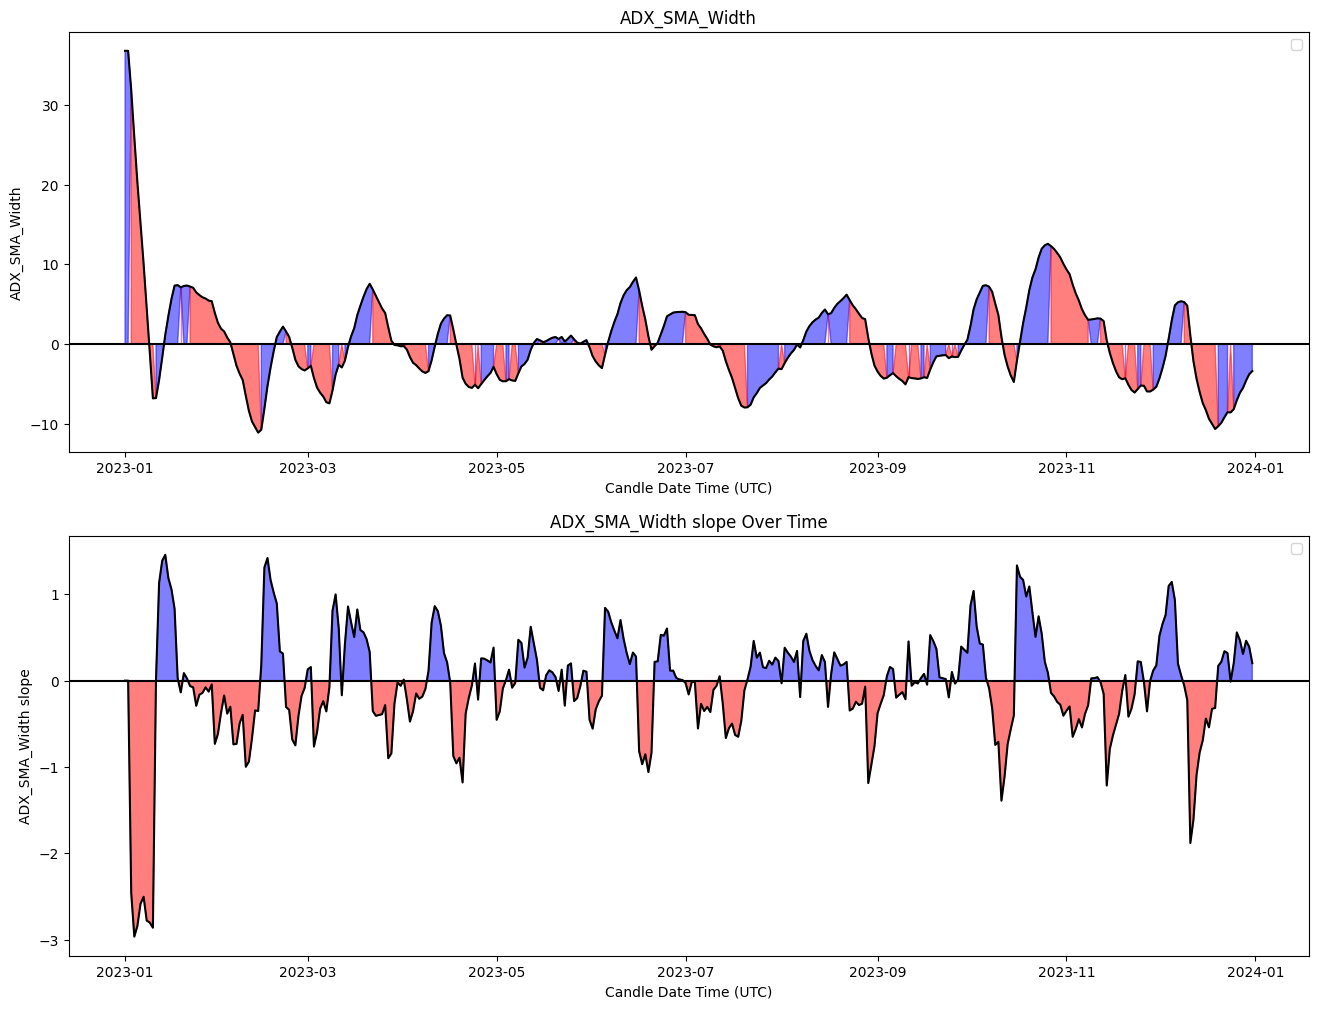

In [57]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.plot(df['candle_date_time_utc'][27:], df['ADX_SMA_width'][27:], color = 'black')
plt.axhline(y=0, color='black')
# Fill the area where width_slope is positive
plt.fill_between(df['candle_date_time_utc'][27:], df['ADX_SMA_width'][27:], where=(df['ADX_SMA_slope'][27:] >= 0), color='blue', alpha=0.5, interpolate=True)
# Fill the area where width_slope is negative
plt.fill_between(df['candle_date_time_utc'][27:], df['ADX_SMA_width'][27:], where=(df['ADX_SMA_slope'][27:] < 0), color='red', alpha=0.5, interpolate=True)
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('ADX_SMA_Width')
plt.title('ADX_SMA_Width')
plt.legend()

plt.subplot(2,1,2)
plt.plot(df['candle_date_time_utc'][27:], df['ADX_SMA_slope'][27:], color = 'black')
plt.axhline(y=0, color='black')
# Fill the area where width_slope is positive
plt.fill_between(df['candle_date_time_utc'][27:], df['ADX_SMA_slope'][27:], where=(df['ADX_SMA_slope'][27:] >= 0), color='blue', alpha=0.5, interpolate=True)
# Fill the area where width_slope is negative
plt.fill_between(df['candle_date_time_utc'][27:], df['ADX_SMA_slope'][27:], where=(df['ADX_SMA_slope'][27:] < 0), color='red', alpha=0.5, interpolate=True)
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('ADX_SMA_Width slope')
plt.title('ADX_SMA_Width slope Over Time')
plt.legend()

plt.show()


### BTC BOL 시각화

볼린저 밴드 폭 크기의 기울기가 -1이 되는 곳을 수축하는 구간으로 설정

동시에 종가의 볼린저 밴드 돌파구간 표시

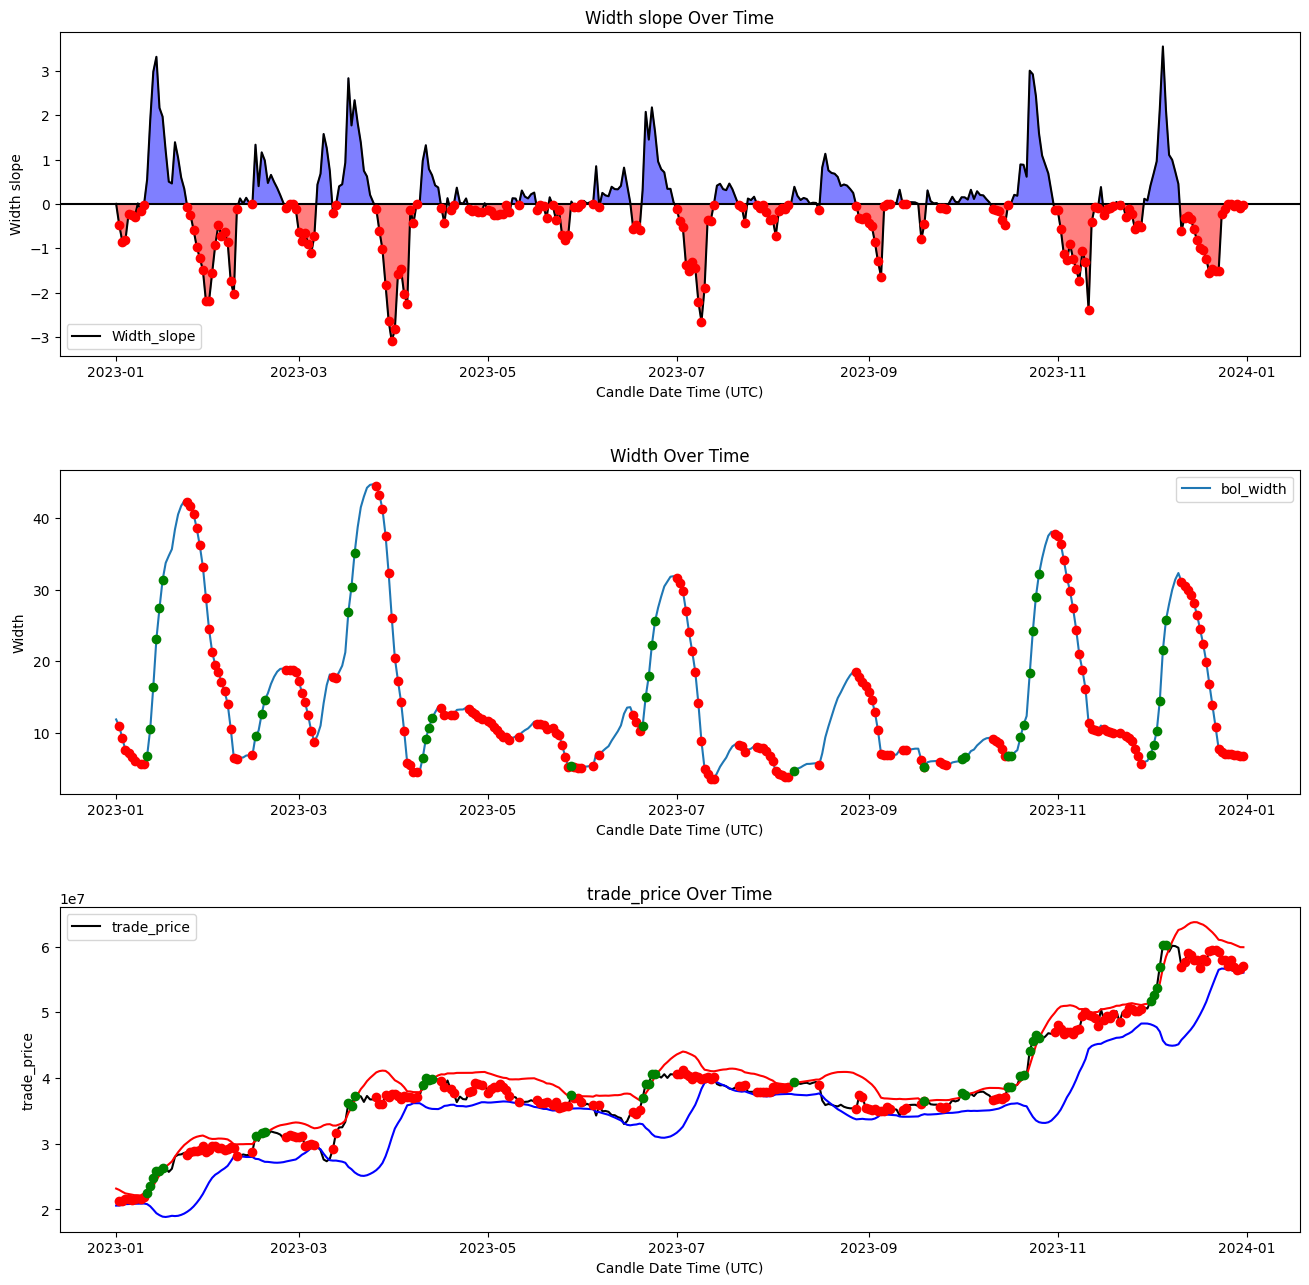

In [58]:
import matplotlib.pyplot as plt
import ta.volatility as tav

df['upper'] = tav.bollinger_hband(df['trade_price'])
df['lower'] = tav.bollinger_lband(df['trade_price'])
df['middle'] = tav.bollinger_mavg(df['trade_price'])
df['bol_width'] = tav.bollinger_wband(df['trade_price'])
df = df[27:]
df = df.reset_index(drop=['index'])

df['bol_width_slope'] = (df['bol_width'] - df['bol_width'].shift().fillna(df['bol_width'])) /2
df['bol_width_slope'] = df['bol_width_slope']

df_minus_width_slope = df.loc[df['bol_width_slope']<0]

df_breakout = df.loc[df['trade_price']>=df['upper']]

plt.figure(figsize=(16,15))

ax1 = plt.subplot(3,1,1)
plt.plot(df['candle_date_time_utc'], df['bol_width_slope'], color='black', label='Width_slope')
plt.axhline(y=0, color='black')
# plt.axhline(y=-1, color='red')
plt.plot(df_minus_width_slope['candle_date_time_utc'],df_minus_width_slope['bol_width_slope'], 'ro')
# Fill the area where bol_width_slope is positive
plt.fill_between(df['candle_date_time_utc'], df['bol_width_slope'], where=(df['bol_width_slope'] >= 0), color='blue', alpha=0.5, interpolate=True)
# Fill the area where bol_width_slope is negative
plt.fill_between(df['candle_date_time_utc'], df['bol_width_slope'], where=(df['bol_width_slope'] < 0), color='red', alpha=0.5, interpolate=True)
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('Width slope')
plt.title('Width slope Over Time')
plt.legend()

ax2 = plt.subplot(3,1,2, sharex=ax1)
plt.plot(df['candle_date_time_utc'], df['bol_width'], label='bol_width')
plt.plot(df_minus_width_slope['candle_date_time_utc'],df_minus_width_slope['bol_width'], 'ro')
plt.plot(df_breakout['candle_date_time_utc'], df_breakout['bol_width'], 'go')
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('Width')
plt.title('Width Over Time')
plt.legend()

ax3 = plt.subplot(3,1,3, sharex=ax1)
plt.plot(df['candle_date_time_utc'], df['trade_price'], color = 'black', label = 'trade_price')
plt.plot(df['candle_date_time_utc'], df['upper'], color = 'r')
plt.plot(df['candle_date_time_utc'], df['lower'], color = 'b')
plt.plot(df_minus_width_slope['candle_date_time_utc'], df_minus_width_slope['trade_price'], 'ro')
plt.plot(df_breakout['candle_date_time_utc'], df_breakout['trade_price'], 'go')
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('trade_price')
plt.title('trade_price Over Time')
plt.legend()

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.show()

### 시각화 자료 종합하기

##### PDI, 볼린저밴드 종합

PDI 상향 돌파 지점을 기준으로 하여 종가 및 추세구간 시각화

동시에 볼린저 밴드 폭 수축( 기울기가 -1 미만)하는 구간과 종가의 볼린저밴드 upper band 돌파 지점 표시 


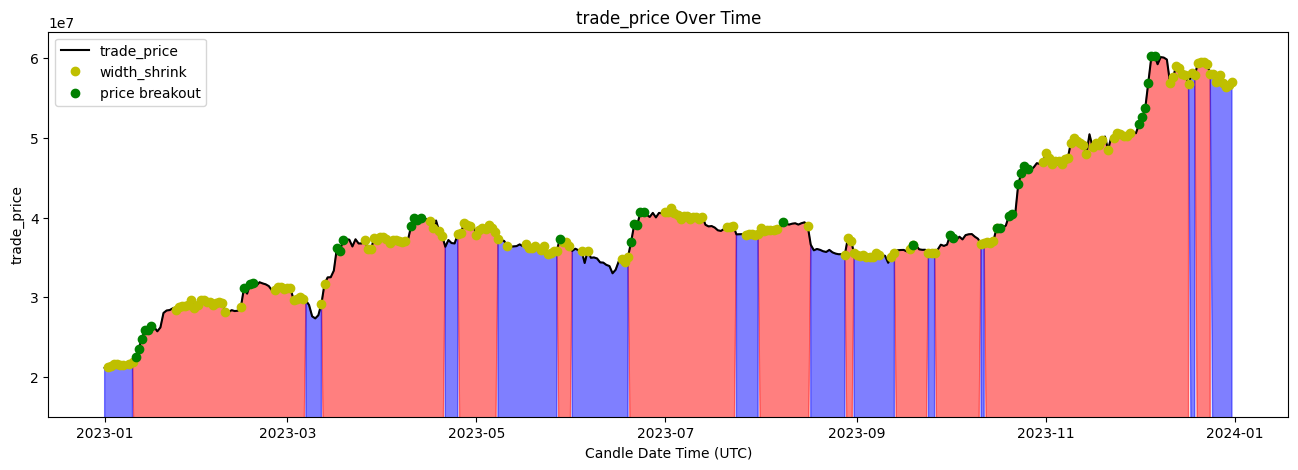

In [59]:
plt.figure(figsize=(16,5))
plt.plot(df['candle_date_time_utc'], df['trade_price'], color='black', label='trade_price')
plt.plot(df_minus_width_slope['candle_date_time_utc'], df_minus_width_slope['trade_price'], 'yo', label='width_shrink')
plt.plot(df_breakout['candle_date_time_utc'], df_breakout['trade_price'], 'go', label='price breakout')
plt.fill_between(df['candle_date_time_utc'], df['trade_price'], where=(df['PDI'] >= df['MDI']), color='r', alpha=0.5, interpolate=True)
plt.fill_between(df['candle_date_time_utc'], df['trade_price'], where=(df['PDI'] < df['MDI']), color='b', alpha=0.5, interpolate=True)
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('trade_price')
plt.title('trade_price Over Time')
plt.ylim(bottom=1.5e7)  # Set the y-axis to start from 1.25e6
plt.legend()

##### ADX, PDI, 볼린저 밴드 종합

ADX가 증가하는 곳에서 추세가 강하게 지지된다. 

ADX가 SMA_10을 상향돌파하는 지점 (ADX_SMA_width >=0)을 매수 신호로 본다. 

C:\Users\PSY\AppData\Local\Temp\ipykernel_32432\1525437583.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


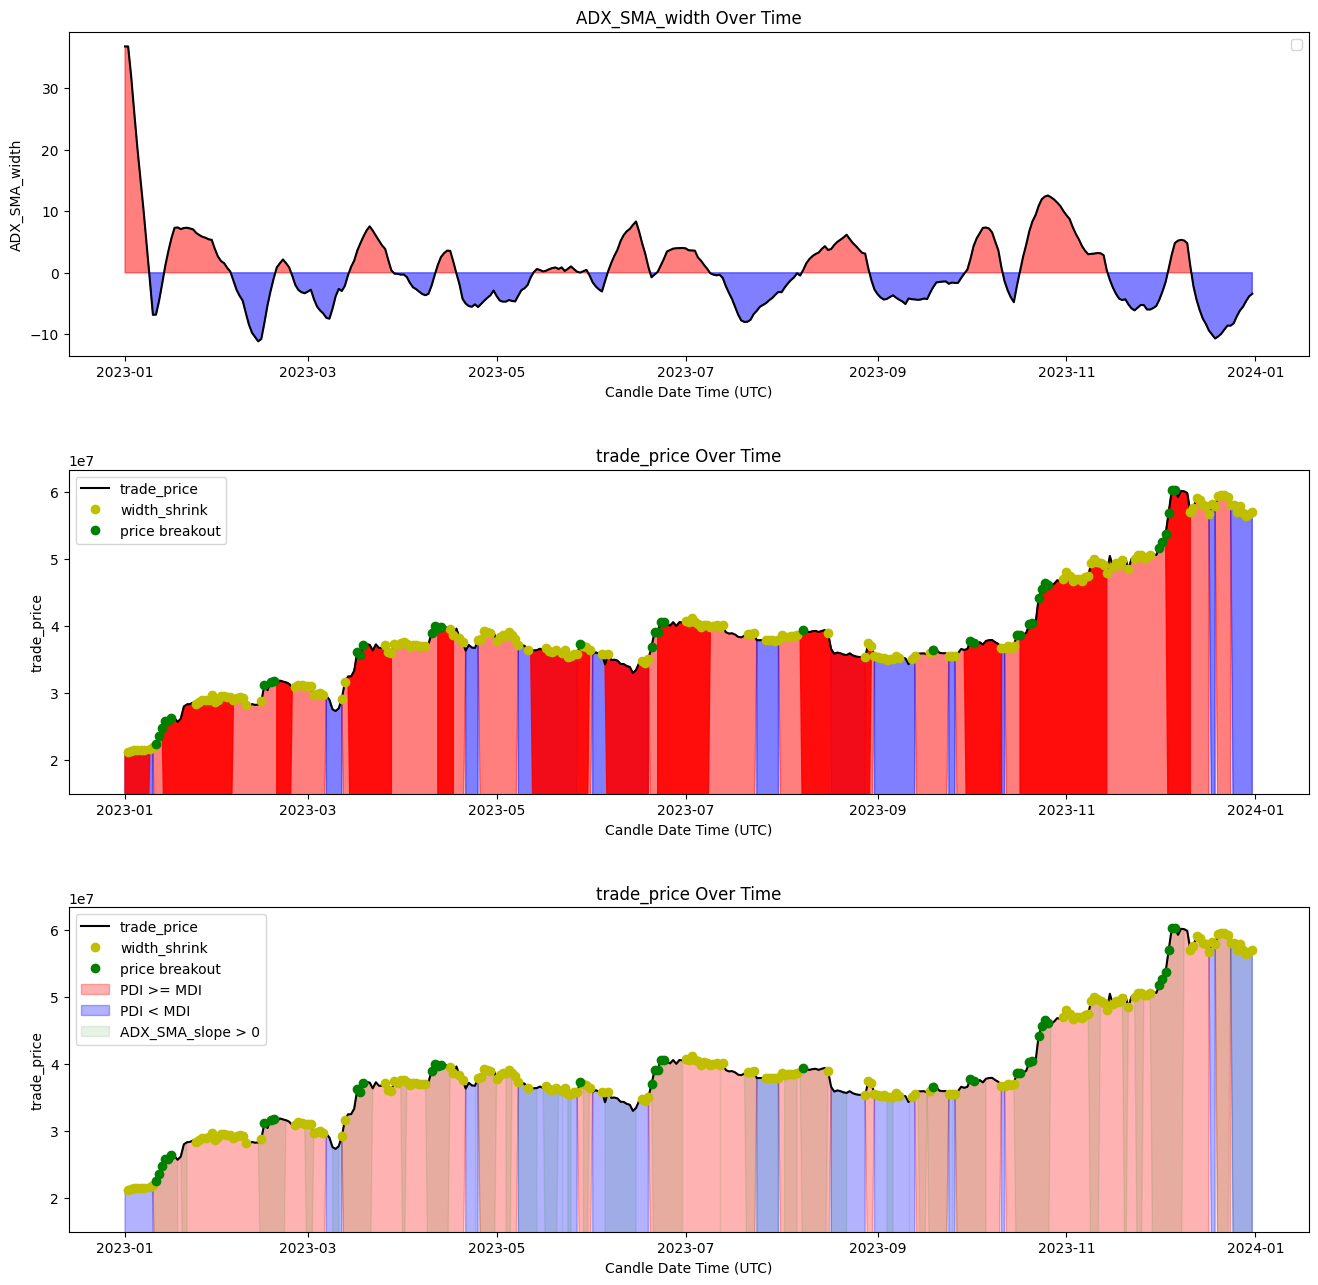

In [60]:
import matplotlib.pyplot as plt
import numpy as np
df_mat = df.copy()
plt.figure(figsize=(16,15))

ax1 = plt.subplot(3,1,1, sharex=ax1)
plt.plot(df['candle_date_time_utc'], df['ADX_SMA_width'], color = 'black')
# Fill the area where width_slope is positive
plt.fill_between(df['candle_date_time_utc'], df['ADX_SMA_width'], where=(df['ADX_SMA_width'] >= 0), color='r', alpha=0.5, interpolate=True)
# Fill the area where width_slope is negative
plt.fill_between(df['candle_date_time_utc'], df['ADX_SMA_width'], where=(df['ADX_SMA_width'] < 0), color='b', alpha=0.5, interpolate=True)
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('ADX_SMA_width',)
plt.title('ADX_SMA_width Over Time')
plt.legend()

ax2 = plt.subplot(3,1,2)
plt.plot(df['candle_date_time_utc'], df['trade_price'], color='black', label='trade_price')
plt.plot(df_minus_width_slope['candle_date_time_utc'], df_minus_width_slope['trade_price'], 'yo', label='width_shrink')
plt.plot(df_breakout['candle_date_time_utc'], df_breakout['trade_price'], 'go', label='price breakout')
plt.fill_between(df['candle_date_time_utc'], df['trade_price'], where=(df['PDI'] >= df['MDI']), color='r', alpha=0.5, interpolate=True)
plt.fill_between(df['candle_date_time_utc'], df['trade_price'], where=(df['PDI'] < df['MDI']), color='b', alpha=0.5, interpolate=True)
plt.fill_between(df['candle_date_time_utc'], df['trade_price'], where=(df['ADX_SMA_width']>0), color='r', alpha=0.9, interpolate=True)
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('trade_price')
plt.title('trade_price Over Time')
plt.ylim(bottom=1.5e7)  # Set the y-axis to start from 1.25e6
plt.legend()

ax3 = plt.subplot(3,1,3)
plt.plot(df['candle_date_time_utc'], df['trade_price'], color='black', label='trade_price')
plt.plot(df_minus_width_slope['candle_date_time_utc'], df_minus_width_slope['trade_price'], 'yo', label='width_shrink')
plt.plot(df_breakout['candle_date_time_utc'], df_breakout['trade_price'], 'go', label='price breakout')
plt.fill_between(df['candle_date_time_utc'], df['trade_price'], where=(df['PDI'] >= df['MDI']), 
                 color='red', alpha=0.3, interpolate=True, label='PDI >= MDI')
plt.fill_between(df['candle_date_time_utc'], df['trade_price'], where=(df['PDI'] < df['MDI']), 
                 color='blue', alpha=0.3, interpolate=True, label='PDI < MDI')
plt.fill_between(df['candle_date_time_utc'], df['trade_price'], where=(df['ADX_SMA_slope'] > 0), 
                 color='green', alpha=0.1, interpolate=True, label='ADX_SMA_slope > 0')
plt.xlabel('Candle Date Time (UTC)')
plt.ylabel('trade_price')
plt.title('trade_price Over Time')
plt.ylim(bottom=1.5e7)  # Set the y-axis to start from 1.25e6
plt.legend()


plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)


plt.show()

### 매수 시점 찾기

width shrink (slope <0) 인 시점 이후 

PDI<MDI 에서 PDI>MDI로 바뀌고 

ADX_SMA_width >0 이 되면 (ADX_SMA_slope로 선제적으로 확인가능)

그 때 price breakout이 생기면 매수하고 새로운 width whrink 나올 때 까지 매수 안함

In [61]:
ADX_SMA_slope = 'plus'

df['ADX_sign'] = False
for i in range(len(df)):
    if df.iloc[i]['ADX_SMA_slope']>=0:
        ADX_SMA_width = 'plus'
        df.loc[i ,'ADX_sign'] = True

    elif df.iloc[i]['ADX_SMA_slope']<0:
        ADX_SMA_slope = 'minus'
df.loc[df['ADX_sign']]

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,...,MDI,SMA_10,ADX_SMA_width,ADX_SMA_slope,upper,lower,middle,bol_width,bol_width_slope,ADX_sign
0,KRW-BTC,2023-01-01,2023-01-01T09:00:00,21079000.0,21171000.0,21002000.0,21123000.0,1672617597561,3.135794e+10,1486.467553,...,34.671432,4.612534,36.776205,0.000000,2.318357e+07,2.059183e+07,21887700.0,11.841068,0.000000,True
1,KRW-BTC,2023-01-02,2023-01-02T09:00:00,21128000.0,21400000.0,21047000.0,21215000.0,1672703999647,5.484883e+10,2578.844531,...,32.364719,9.211282,36.776205,0.000000,2.297685e+07,2.060395e+07,21790400.0,10.889617,-0.475725,True
10,KRW-BTC,2023-01-11,2023-01-11T09:00:00,21916000.0,22501000.0,21871000.0,22485000.0,1673481597400,6.754971e+10,3066.635492,...,19.487942,40.596307,-6.802658,0.017540,2.226250e+07,2.081480e+07,21538650.0,6.721383,0.547462,True
11,KRW-BTC,2023-01-12,2023-01-12T09:00:00,22475000.0,23900000.0,22415000.0,23552000.0,1673568000029,1.759627e+11,7650.901631,...,14.737933,39.493004,-4.538549,1.132054,2.275589e+07,2.048941e+07,21622650.0,10.481929,1.880273,True
12,KRW-BTC,2023-01-13,2023-01-13T09:00:00,23546000.0,24902000.0,23378000.0,24802000.0,1673654400007,1.546906e+11,6444.405014,...,11.610304,38.615885,-1.759745,1.389402,2.355490e+07,1.997550e+07,21765200.0,16.445531,2.981801,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,KRW-BTC,2023-12-27,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3965.842823,...,23.667198,30.317814,-6.144206,0.467826,6.053803e+07,5.642807e+07,58483050.0,7.027597,-0.011165,True
361,KRW-BTC,2023-12-28,2023-12-28T09:00:00,57920000.0,58468000.0,56700000.0,56907000.0,1703807999951,2.269573e+11,3958.816736,...,21.902958,28.765434,-5.525593,0.309307,6.033740e+07,5.630520e+07,58321300.0,6.913753,-0.056922,True
362,KRW-BTC,2023-12-29,2023-12-29T09:00:00,56904000.0,57300000.0,56000000.0,56450000.0,1703894399762,2.419572e+11,4273.270718,...,23.683399,27.448236,-4.601773,0.461910,6.014296e+07,5.613644e+07,58139700.0,6.891208,-0.011273,True
363,KRW-BTC,2023-12-30,2023-12-30T09:00:00,56450000.0,57150000.0,56101000.0,56639000.0,1703980799652,1.301367e+11,2301.724829,...,22.589271,26.297408,-3.816223,0.392775,5.992580e+07,5.603400e+07,57979900.0,6.712332,-0.089438,True


In [62]:
df['DMI_sign'] = False
df.loc[df['PDI'] - df['MDI']>0, 'DMI_sign'] = True

In [63]:
bol_sign = False
df['bol_shrink'] = False
df['break_point'] = False
df.loc[df['bol_width_slope']<0, 'bol_shrink'] = True
df.loc[df['trade_price']>=df['upper'], 'break_point'] = True
df.loc[df['break_point']]

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,...,ADX_SMA_slope,upper,lower,middle,bol_width,bol_width_slope,ADX_sign,DMI_sign,bol_shrink,break_point
10,KRW-BTC,2023-01-11,2023-01-11T09:00:00,21916000.0,22501000.0,21871000.0,22485000.0,1673481597400,6.754971e+10,3066.635492,...,0.017540,2.226250e+07,2.081480e+07,21538650.0,6.721383,0.547462,True,True,False,True
11,KRW-BTC,2023-01-12,2023-01-12T09:00:00,22475000.0,23900000.0,22415000.0,23552000.0,1673568000029,1.759627e+11,7650.901631,...,1.132054,2.275589e+07,2.048941e+07,21622650.0,10.481929,1.880273,True,True,False,True
12,KRW-BTC,2023-01-13,2023-01-13T09:00:00,23546000.0,24902000.0,23378000.0,24802000.0,1673654400007,1.546906e+11,6444.405014,...,1.389402,2.355490e+07,1.997550e+07,21765200.0,16.445531,2.981801,True,True,False,True
13,KRW-BTC,2023-01-14,2023-01-14T09:00:00,24802000.0,26201000.0,24766000.0,25881000.0,1673740799979,3.680309e+11,14303.123998,...,1.458126,2.450200e+07,1.943170e+07,21966850.0,23.081572,3.318020,True,True,False,True
14,KRW-BTC,2023-01-15,2023-01-15T09:00:00,25873000.0,25990000.0,25447000.0,25836000.0,1673827199033,1.225455e+11,4769.184180,...,1.187456,2.521265e+07,1.913445e+07,22173550.0,27.411906,2.165167,True,True,False,True
15,KRW-BTC,2023-01-16,2023-01-16T09:00:00,25857000.0,26585000.0,25600000.0,26368000.0,1673913599159,1.428978e+11,5477.232713,...,1.058581,2.594083e+07,1.891097e+07,22425900.0,31.347015,1.967554,True,True,False,True
45,KRW-BTC,2023-02-15,2023-02-15T09:00:00,28782000.0,31400000.0,28611000.0,31186000.0,1676505600030,3.812376e+11,12911.880829,...,1.310986,3.046542e+07,2.770838e+07,29086900.0,9.478647,1.334689,True,True,False,True
47,KRW-BTC,2023-02-17,2023-02-17T09:00:00,30466000.0,32090000.0,30278000.0,31641000.0,1676678399981,2.844220e+11,9141.337837,...,1.166605,3.113663e+07,2.744507e+07,29290850.0,12.603142,1.162229,True,True,False,True
48,KRW-BTC,2023-02-18,2023-02-18T09:00:00,31641000.0,32014000.0,31498000.0,31789000.0,1676764799222,1.673712e+11,5267.640332,...,1.021303,3.153722e+07,2.725638e+07,29396800.0,14.562294,0.979576,True,True,False,True
75,KRW-BTC,2023-03-17,2023-03-17T09:00:00,33309000.0,36649000.0,33300000.0,36207000.0,1679097599981,5.270690e+11,15037.600372,...,0.824851,3.470221e+07,2.647529e+07,30588750.0,26.895271,2.834294,True,True,False,True


In [64]:
breakpoint_found = False
cnt = 0
for i in range(len(df)):
    if df.loc[i,'break_point'] :
        if not breakpoint_found:
            breakpoint_found = True
            cnt+=1
        else:
            df.loc[i,'break_point'] = False
            continue
    else: 
        if df.loc[i,'bol_shrink']:
            breakpoint_found = False
        else:
            continue

df.loc[df['break_point']]
# cnt

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,...,ADX_SMA_slope,upper,lower,middle,bol_width,bol_width_slope,ADX_sign,DMI_sign,bol_shrink,break_point
10,KRW-BTC,2023-01-11,2023-01-11T09:00:00,21916000.0,22501000.0,21871000.0,22485000.0,1673481597400,6.754971e+10,3066.635492,...,0.017540,2.226250e+07,2.081480e+07,21538650.0,6.721383,0.547462,True,True,False,True
45,KRW-BTC,2023-02-15,2023-02-15T09:00:00,28782000.0,31400000.0,28611000.0,31186000.0,1676505600030,3.812376e+11,12911.880829,...,1.310986,3.046542e+07,2.770838e+07,29086900.0,9.478647,1.334689,True,True,False,True
75,KRW-BTC,2023-03-17,2023-03-17T09:00:00,33309000.0,36649000.0,33300000.0,36207000.0,1679097599981,5.270690e+11,15037.600372,...,0.824851,3.470221e+07,2.647529e+07,30588750.0,26.895271,2.834294,True,True,False,True
99,KRW-BTC,2023-04-10,2023-04-10T09:00:00,37331000.0,39183000.0,37255000.0,38985000.0,1681171198134,2.566560e+11,6752.314109,...,0.671173,3.830166e+07,3.589954e+07,37100600.0,6.474625,0.970151,True,True,False,True
147,KRW-BTC,2023-05-28,2023-05-28T09:00:00,35824000.0,37532000.0,35788000.0,37350000.0,1685318399539,1.409947e+11,3852.977529,...,-0.066983,3.730410e+07,3.535780e+07,36330950.0,5.357145,0.052517,False,True,False,True
170,KRW-BTC,2023-06-20,2023-06-20T09:00:00,35095000.0,37100000.0,35000000.0,36946000.0,1687305599827,1.972483e+11,5488.638490,...,-0.836569,3.677459e+07,3.298121e+07,34877900.0,10.876166,0.307632,False,True,False,True
219,KRW-BTC,2023-08-08,2023-08-08T09:00:00,38622000.0,39580000.0,38570000.0,39437000.0,1691539195177,1.543682e+11,3956.683155,...,0.459622,3.924961e+07,3.748929e+07,38369450.0,4.587834,0.385244,True,True,False,True
261,KRW-BTC,2023-09-19,2023-09-19T09:00:00,36000000.0,36820000.0,35750000.0,36500000.0,1695167998742,1.124439e+11,3097.748505,...,0.457932,3.636774e+07,3.450826e+07,35438000.0,5.247115,-0.456676,True,True,True,True
273,KRW-BTC,2023-10-01,2023-10-01T09:00:00,36614000.0,37817000.0,36555000.0,37789000.0,1696204799858,1.012743e+11,2733.222524,...,0.869507,3.718351e+07,3.491789e+07,36050700.0,6.284532,0.148993,True,True,False,True
288,KRW-BTC,2023-10-16,2023-10-16T09:00:00,37087000.0,40700000.0,37000000.0,38697000.0,1697500798875,3.519136e+11,9125.609524,...,1.334853,3.847277e+07,3.596793e+07,37220350.0,6.729738,-0.028448,True,True,True,True


In [65]:
df.loc[df['ADX_sign']]

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,...,ADX_SMA_slope,upper,lower,middle,bol_width,bol_width_slope,ADX_sign,DMI_sign,bol_shrink,break_point
0,KRW-BTC,2023-01-01,2023-01-01T09:00:00,21079000.0,21171000.0,21002000.0,21123000.0,1672617597561,3.135794e+10,1486.467553,...,0.000000,2.318357e+07,2.059183e+07,21887700.0,11.841068,0.000000,True,False,False,False
1,KRW-BTC,2023-01-02,2023-01-02T09:00:00,21128000.0,21400000.0,21047000.0,21215000.0,1672703999647,5.484883e+10,2578.844531,...,0.000000,2.297685e+07,2.060395e+07,21790400.0,10.889617,-0.475725,True,False,True,False
10,KRW-BTC,2023-01-11,2023-01-11T09:00:00,21916000.0,22501000.0,21871000.0,22485000.0,1673481597400,6.754971e+10,3066.635492,...,0.017540,2.226250e+07,2.081480e+07,21538650.0,6.721383,0.547462,True,True,False,True
11,KRW-BTC,2023-01-12,2023-01-12T09:00:00,22475000.0,23900000.0,22415000.0,23552000.0,1673568000029,1.759627e+11,7650.901631,...,1.132054,2.275589e+07,2.048941e+07,21622650.0,10.481929,1.880273,True,True,False,False
12,KRW-BTC,2023-01-13,2023-01-13T09:00:00,23546000.0,24902000.0,23378000.0,24802000.0,1673654400007,1.546906e+11,6444.405014,...,1.389402,2.355490e+07,1.997550e+07,21765200.0,16.445531,2.981801,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,KRW-BTC,2023-12-27,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3965.842823,...,0.467826,6.053803e+07,5.642807e+07,58483050.0,7.027597,-0.011165,True,False,True,False
361,KRW-BTC,2023-12-28,2023-12-28T09:00:00,57920000.0,58468000.0,56700000.0,56907000.0,1703807999951,2.269573e+11,3958.816736,...,0.309307,6.033740e+07,5.630520e+07,58321300.0,6.913753,-0.056922,True,False,True,False
362,KRW-BTC,2023-12-29,2023-12-29T09:00:00,56904000.0,57300000.0,56000000.0,56450000.0,1703894399762,2.419572e+11,4273.270718,...,0.461910,6.014296e+07,5.613644e+07,58139700.0,6.891208,-0.011273,True,False,True,False
363,KRW-BTC,2023-12-30,2023-12-30T09:00:00,56450000.0,57150000.0,56101000.0,56639000.0,1703980799652,1.301367e+11,2301.724829,...,0.392775,5.992580e+07,5.603400e+07,57979900.0,6.712332,-0.089438,True,False,True,False


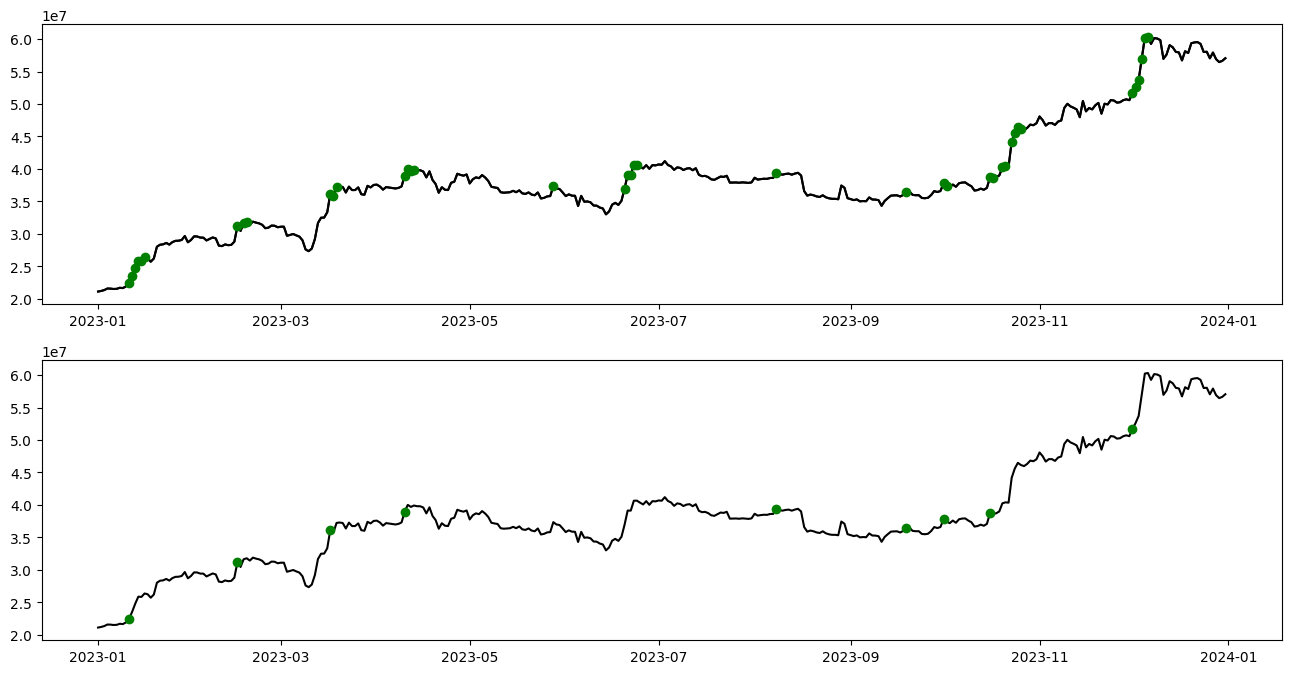

In [66]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.plot(df['candle_date_time_utc'],df['trade_price'],color='black')
plt.plot(df['candle_date_time_utc'],df['trade_price'],color='black')
plt.plot(df_breakout['candle_date_time_utc'],df_breakout['trade_price'], 'go' )

plt.subplot(2,1,2)
plt.plot(df['candle_date_time_utc'],df['trade_price'],color='black')
plt.plot(df.loc[df['break_point'] & df['ADX_sign'] & df['DMI_sign'],'candle_date_time_utc'],
         df.loc[df['break_point'] & df['ADX_sign'] & df['DMI_sign'],'trade_price'], 'go' )

plt.show()